# Positivy Bias Analysis

## Determining Bias Towards Favorable Reviews from Amazon Vine Program Participants

### Data Preparation

In [1]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# Read in vine_table as DataFrame
df = pd.read_csv("vine_table.csv")
df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,REAKC26P07MDN,5.0,0.0,0.0,N,Y
1,R3NU7OMZ4HQIEG,2.0,0.0,1.0,N,Y
2,R14QJW3XF8QO1P,5.0,0.0,0.0,N,Y
3,R2HB7AX0394ZGY,5.0,0.0,0.0,N,Y
4,RGKMPDQGSAHR3,5.0,0.0,0.0,N,Y


In [3]:
# Filter for total_votes >= 20
df_2 = df.loc[df['total_votes'] >= 20]
df_2.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
128,R21KC552Y6HL8X,1.0,27.0,31.0,N,Y
161,RX9WC9FTIR1XR,5.0,25.0,25.0,N,Y
256,RGDCOU1KBHMNG,3.0,29.0,31.0,N,Y
267,RVTYWID2TPMMY,2.0,35.0,42.0,N,Y
719,R2CMPZ5VESGRLY,4.0,27.0,28.0,N,Y


In [4]:
# Filter for >= 50% helpful_votes
df_3 = df_2.loc[(df_2['helpful_votes']/df_2['total_votes']) >= .5]
df_3.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
128,R21KC552Y6HL8X,1.0,27.0,31.0,N,Y
161,RX9WC9FTIR1XR,5.0,25.0,25.0,N,Y
256,RGDCOU1KBHMNG,3.0,29.0,31.0,N,Y
267,RVTYWID2TPMMY,2.0,35.0,42.0,N,Y
719,R2CMPZ5VESGRLY,4.0,27.0,28.0,N,Y


In [5]:
# Inspect null values
df_3.isnull().sum()

review_id            0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
dtype: int64

In [6]:
# Inspect data types
df_3.dtypes

review_id             object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
dtype: object

In [7]:
# Add star_str column with star rating as string type
df_3['star_str'] = (df_3['star_rating'].astype(str)).str.replace(r'.0', '')
df_3.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,star_str
128,R21KC552Y6HL8X,1.0,27.0,31.0,N,Y,1
161,RX9WC9FTIR1XR,5.0,25.0,25.0,N,Y,5
256,RGDCOU1KBHMNG,3.0,29.0,31.0,N,Y,3
267,RVTYWID2TPMMY,2.0,35.0,42.0,N,Y,2
719,R2CMPZ5VESGRLY,4.0,27.0,28.0,N,Y,4


In [8]:
# Create 'review_type' column for 'Paid', 'Unpaid'
df_3['review_type'] = df_3['vine'].map({'N': 'Unpaid', 'Y': 'Paid'})
df_3.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,star_str,review_type
128,R21KC552Y6HL8X,1.0,27.0,31.0,N,Y,1,Unpaid
161,RX9WC9FTIR1XR,5.0,25.0,25.0,N,Y,5,Unpaid
256,RGDCOU1KBHMNG,3.0,29.0,31.0,N,Y,3,Unpaid
267,RVTYWID2TPMMY,2.0,35.0,42.0,N,Y,2,Unpaid
719,R2CMPZ5VESGRLY,4.0,27.0,28.0,N,Y,4,Unpaid


In [9]:
# New clean DataFrame
review_df = df_3.copy()
review_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,star_str,review_type
128,R21KC552Y6HL8X,1.0,27.0,31.0,N,Y,1,Unpaid
161,RX9WC9FTIR1XR,5.0,25.0,25.0,N,Y,5,Unpaid
256,RGDCOU1KBHMNG,3.0,29.0,31.0,N,Y,3,Unpaid
267,RVTYWID2TPMMY,2.0,35.0,42.0,N,Y,2,Unpaid
719,R2CMPZ5VESGRLY,4.0,27.0,28.0,N,Y,4,Unpaid


### Data Organization

In [10]:
# Create DataFrame for Vine Program participants
paid_df = review_df.loc[review_df['vine'] == 'Y']

# Create DataFrame for non-Vine Program participants
unpaid_df = review_df.loc[review_df['vine'] == 'N']

In [11]:
# Inspect paid_df
paid_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,star_str,review_type
8547,R3A71VR1JZD8WF,2.0,27.0,30.0,Y,N,2,Paid
10246,R16OMUJIGI18JZ,5.0,72.0,72.0,Y,N,5,Paid
25168,R3TS8ZP2FHQ9XR,5.0,39.0,42.0,Y,N,5,Paid
46422,R2MHP919VZN7DI,5.0,29.0,30.0,Y,N,5,Paid
66446,RD2BCTVS59A5L,2.0,20.0,20.0,Y,N,2,Paid


In [12]:
# Inspect unpaid_df
unpaid_df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,star_str,review_type
128,R21KC552Y6HL8X,1.0,27.0,31.0,N,Y,1,Unpaid
161,RX9WC9FTIR1XR,5.0,25.0,25.0,N,Y,5,Unpaid
256,RGDCOU1KBHMNG,3.0,29.0,31.0,N,Y,3,Unpaid
267,RVTYWID2TPMMY,2.0,35.0,42.0,N,Y,2,Unpaid
719,R2CMPZ5VESGRLY,4.0,27.0,28.0,N,Y,4,Unpaid


## Analysis

### Summary Statistics

In [30]:
# DataFrame of Paid vs. Unpaid Review Summary Stars
review_summary = pd.DataFrame({'Paid': paid_df.star_rating.describe(),
                               'Unpaid': unpaid_df.star_rating.describe()}).transpose()
review_summary

,count,mean,std,min,25%,50%,75%,max
Paid,170.0,3.929412,1.112471,1.0,3.0,4.0,5.0,5.0
Unpaid,37840.0,3.764746,1.605556,1.0,2.0,5.0,5.0,5.0


In [34]:
# Add count of 5-star reviews, % of 5-star reviews
paid_count = len(paid_df)
unpaid_count = len(unpaid_df)
paid_5_count = len(paid_df[paid_df['star_rating']==5.0])
unpaid_5_count = len(unpaid_df[unpaid_df['star_rating']==5.0])

review_summary['count_5_star'] = [paid_5_count, unpaid_5_count]
review_summary['percent_5_star'] = [round((paid_5_count / paid_count)*100, 2), round((unpaid_5_count / unpaid_count)*100, 2)]

# Display
review_summary

,count,mean,std,min,25%,50%,75%,max,count_5_star,percent_5_star
Paid,170.0,3.929412,1.112471,1.0,3.0,4.0,5.0,5.0,65,38.24
Unpaid,37840.0,3.764746,1.605556,1.0,2.0,5.0,5.0,5.0,20612,54.47


### Plotting

Text(0, 0.5, 'Density')

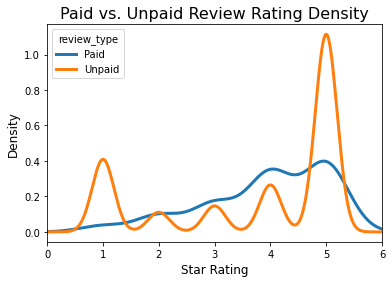

In [54]:
# Density Plots
review_df_wide = review_df.pivot(columns='review_type', values='star_rating')
review_df_wide.plot.density(linewidth=3, xlim=(0,6))
plt.title('Paid vs. Unpaid Review Rating Density', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

#### Density Plot Analysis
- Paid distribution is skewed right.
- Unpaid distribution is bimodal; concentrated at 1 and 5.

In [57]:
# Boxplot
fig = px.box(review_df, x="review_type", y="star_rating", title="Paid vs. Unpaid Review Ratings",
            labels={
                'review_type': 'Review Type',
                'star_rating': 'Star Rating'
            })
# Reorder x-axis
fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()

In [ ]:
# Bar Charts


In [ ]:
# Combined Histogram
hist_data = [unpaid_df.star_rating, paid_df.star_rating]
labels = ['Unpaid', 'Paid']

fig = ff.create_distplot(hist_data, labels, bin_size=1, show_rug=False)
fig.show()